In [12]:
from   matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression

%matplotlib inline

In [5]:
!ls ../../data

Monthly_CO2_Concentrations.csv quakes.dat
cmort.dat


In [8]:
DATA = '../../data'
data = pd.read_csv(f'{DATA}/Monthly_CO2_Concentrations.csv')
data.sort_values(['Year', 'Month'], inplace=True)
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


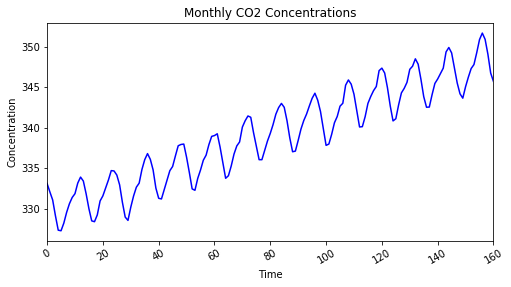

In [11]:
plt.figure(figsize=(8, 4))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 Concentrations')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.xticks(rotation=30);

In [16]:
trend_mod = LinearRegression(normalize=True)
trend_mod.fit(np.array(data.index).reshape((-1, 1)), data.CO2)
print(f'Intercept: {trend_mod.intercept_:.2f}\n'
      f'Time: {trend_mod.coef_[0]:.2f}')

Intercept: 329.45
Time: 0.12


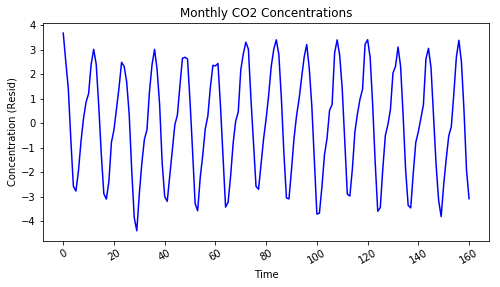

In [19]:
plt.figure(figsize=(8, 4))
fitted = trend_mod.predict(np.array(data.index).reshape((-1, 1)))
resids = np.array(data.CO2) - fitted
plt.plot(data.index, resids, 'b-')
plt.title('Monthly CO2 Concentrations')
plt.xlabel('Time')
plt.ylabel('Concentration (Resid)')
plt.xticks(rotation=30);